203. 移除链表元素

给你一个链表的头节点 head 和一个整数 val ，请你删除链表中所有满足 Node.val == val 的节点，并返回 新的头节点。

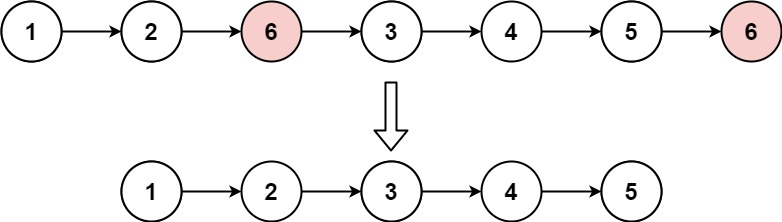

示例 1：

输入：head = [1,2,6,3,4,5,6], val = 6
输出：[1,2,3,4,5]
示例 2：

输入：head = [], val = 1
输出：[]
示例 3：

输入：head = [7,7,7,7], val = 7
输出：[]
 

提示：
列表中的节点数目在范围 [0, 104] 内
1 <= Node.val <= 50
0 <= val <= 50

# 两种情况：

如果是头节点：删除方式会不同
头节点: 删除当前节点，把head替换为下一个节点
中间节点: 删除当前节点，将前一个节点的指针指向下一个节点

为了让节点的操作统一，采用虚拟头节点法

# 虚拟头节点

先 new 一个节点，作为头节点链接到head前
遍历结束，return dummy.next, 也就是原先链表的头节点
注意如果真实的头节点符合条件，它也可能会被删除

In [37]:
from typing import Optional

# 定义链表节点类
class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next

    # 用于打印链表
    def __repr__(self):
        result = []
        current = self
        while current:
            result.append(current.val)
            current = current.next
        return "->".join(map(str, result))


class Solution:
    def removeElements(self, head: Optional[ListNode], val: int) -> Optional[ListNode]:
        dummy_head = ListNode(next = head)

        current = dummy_head

        while current.next:
            if current.next.val == val:
                current.next = current.next.next
            else:
                current = current.next

        return dummy_head.next


In [38]:
# 三种思路：分别对应method1,2,3
# 1.删除节点分为两种情况，删除头节点和非头节点
# 2.添加一个虚拟头节点，对头节点的删除操作与其他节点一样
# 3.递归
# method1 分类讨论
class Solution1: 
    def removeElements(self, head: ListNode, val: int) -> ListNode:
        while head and head.val == val:
            # 让自head起第一个值不为val的节点作为头节点
            # 退出while循环时，有两种情况
            # 1 head为空(即链表左右节点值均为val，则进入if并return
            # 2 找到了第一个值不为val的节点(是真正的头节点)，那么之后就开始对该节点之后的非头节点的元素进行遍历处理
            head = head.next
        if head is None:
            return head
        node = head
        while node.next:
            if node.next.val == val:
                node.next = node.next.next
            else:
                node = node.next
        return head

# method2 虚拟头节点
class Solution2:
    def removeElements(self, head: ListNode, val: int) -> ListNode:
        dummy_node = ListNode(next=head)
        node = dummy_node
        while node.next:
            if node.next.val == val:
                node.next = node.next.next
            else:
                node = node.next
        return dummy_node.next


# method3 递归
class Solution3:
    def removeElements(self, head: ListNode, val: int) -> ListNode:
        if head is None:
            return head
        head.next = self.removeElements(head.next, val)
        # 利用递归快速到达链表尾端，然后从后往前判断并删除重复元素
        return head.next if head.val == val else head
        # 每次递归返回的为当前递归层的head(若其值不为val)或head.next
        # head.next及之后的链表在深层递归中已经做了删除值为val节点的处理，
        # 因此只需要判断当前递归层的head值是否为val，从而决定head是删是留即可


In [39]:
# 测试代码

# 定义链表节点类
class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next

    # 用于打印链表
    def __repr__(self):
        result = []
        current = self
        while current:
            result.append(current.val)
            current = current.next
        return "->".join(map(str, result))

# 辅助函数：从列表生成链表
def create_linked_list(values):
    if not values:  # 空列表返回 None
        return None
    head = ListNode(values[0])  # 创建头节点
    current = head
    for value in values[1:]:
        current.next = ListNode(value)  # 创建新节点并链接
        current = current.next  # 更新指针
    return head

# 辅助函数：从链表生成列表
def linked_list_to_list(head):
    result = []
    while head:  # 遍历链表直到 None
        result.append(head.val)
        head = head.next
    return result

# 测试函数
def test_removeElements():
    # 测试用例
    test_cases = [
        {"input": ([1, 2, 6, 3, 4, 5, 6], 6), "expected": [1, 2, 3, 4, 5]},
        {"input": ([1], 1), "expected": []},
        {"input": ([1, 1, 1, 1], 1), "expected": []},
        {"input": ([1, 2, 3, 4], 5), "expected": [1, 2, 3, 4]},
        {"input": ([], 1), "expected": []},
    ]

    # 测试三种实现
    solutions = [Solution1(), Solution2(), Solution3()]

    for i, case in enumerate(test_cases):
        input_list, val = case["input"]
        expected = case["expected"]
        print(f"Test case {i + 1}: Input {input_list} with val={val}")

        for j, solution in enumerate(solutions):
            # 创建链表
            head = create_linked_list(input_list)
            # 调用方法
            new_head = solution.removeElements(head, val)
            # 转换结果为列表
            result = linked_list_to_list(new_head)

            # 验证结果
            assert result == expected, f"Method {j + 1} failed for test case {i + 1}: Expected {expected}, Got {result}"
            print(f"  Method {j + 1} passed: Output {result}")
        print()


# 运行测试
test_removeElements()


Test case 1: Input [1, 2, 6, 3, 4, 5, 6] with val=6
  Method 1 passed: Output [1, 2, 3, 4, 5]
  Method 2 passed: Output [1, 2, 3, 4, 5]
  Method 3 passed: Output [1, 2, 3, 4, 5]

Test case 2: Input [1] with val=1
  Method 1 passed: Output []
  Method 2 passed: Output []
  Method 3 passed: Output []

Test case 3: Input [1, 1, 1, 1] with val=1
  Method 1 passed: Output []
  Method 2 passed: Output []
  Method 3 passed: Output []

Test case 4: Input [1, 2, 3, 4] with val=5
  Method 1 passed: Output [1, 2, 3, 4]
  Method 2 passed: Output [1, 2, 3, 4]
  Method 3 passed: Output [1, 2, 3, 4]

Test case 5: Input [] with val=1
  Method 1 passed: Output []
  Method 2 passed: Output []
  Method 3 passed: Output []



In [40]:
class MyLinkedNode:
    def __init__(self, val = 0, next = None):
        self.val = val
        self.next = next

class MyLinkedList:

    def __init__(self):
        self.dummy_head = MyLinkedNode()
        self.size = 0

    def get(self, index: int) -> int:
        if index < 0 or index >= self.size:
            return -1
        
        else:
            current = self.dummy_head.next

            # 要从头遍历才能找到对象
            for i in range(index):
                current = current.next
            return current.val

    def addAtHead(self, val: int) -> None:
        self.dummy_head.next = MyLinkedNode(val,self.dummy_head.next)
        self.size += 1

    def addAtTail(self, val: int) -> None:
        current = self.dummy_head
        while current.next:
            current = current.next
        current.next = MyLinkedNode(val)
        self.size += 1

    def addAtIndex(self, index: int, val: int) -> None:
        if index < 0 or index > self.size:
            return
        
        current = self.dummy_head
        for i in range(index):
            current = current.next
        current.next = MyLinkedNode(val, current.next)
        self.size += 1

    def deleteAtIndex(self, index: int) -> None:
        if index < 0 or index >= self.size:
            return

        current = self.dummy_head
        for i in range(index):
            current = current.next
        current.next = current.next.next
        self.size -= 1
        


# Your MyLinkedList object will be instantiated and called as such:
# obj = MyLinkedList()
# param_1 = obj.get(index)
# obj.addAtHead(val)
# obj.addAtTail(val)
# obj.addAtIndex(index,val)
# obj.deleteAtIndex(index)

In [41]:
def test_my_linked_list():
    # 创建一个空的链表
    linked_list = MyLinkedList()

    # 测试用例 1: 空链表的 get 操作
    assert linked_list.get(0) == -1, "Failed: Get from empty list"

    # 测试用例 2: 添加头部
    linked_list.addAtHead(1)
    assert linked_list.get(0) == 1, "Failed: Add at head"

    # 测试用例 3: 添加尾部
    linked_list.addAtTail(2)
    assert linked_list.get(1) == 2, "Failed: Add at tail"

    # 测试用例 4: 添加中间
    linked_list.addAtIndex(1, 3)
    assert linked_list.get(1) == 3, "Failed: Add at index"
    assert linked_list.get(2) == 2, "Failed: Add at index did not maintain order"

    # 测试用例 5: 删除中间
    linked_list.deleteAtIndex(1)
    assert linked_list.get(1) == 2, "Failed: Delete at index"

    # 测试用例 6: 删除头部
    linked_list.deleteAtIndex(0)
    assert linked_list.get(0) == 2, "Failed: Delete head"

    # 测试用例 7: 删除尾部
    linked_list.deleteAtIndex(0)
    assert linked_list.get(0) == -1, "Failed: Delete tail"

    # 测试用例 8: 添加到超出范围的索引
    linked_list.addAtIndex(5, 10)  # 无操作
    assert linked_list.get(0) == -1, "Failed: Add at invalid index"

    # 测试用例 9: 添加到空链表的尾部
    linked_list.addAtIndex(0, 4)
    assert linked_list.get(0) == 4, "Failed: Add at valid index in empty list"

    # 测试用例 10: 删除超出范围的索引
    linked_list.deleteAtIndex(10)  # 无操作
    assert linked_list.get(0) == 4, "Failed: Delete at invalid index"

    # 测试用例 11: 添加多个节点
    linked_list.addAtHead(3)
    linked_list.addAtTail(5)
    linked_list.addAtTail(6)
    assert linked_list.get(0) == 3, "Failed: Add multiple nodes at head/tail"
    assert linked_list.get(1) == 4, "Failed: Add multiple nodes at head/tail"
    assert linked_list.get(2) == 5, "Failed: Add multiple nodes at head/tail"
    assert linked_list.get(3) == 6, "Failed: Add multiple nodes at head/tail"

    print("All test cases passed!")

# 运行测试
test_my_linked_list()


All test cases passed!


In [42]:
# 双链表法

# 双链表要比单链表性能好一些
# 占用空间会大一些

class MyDoubleLinkedNode:
    def __init__(self, val=0, prev=None, next=None):
        self.val = val
        self.next = next
        self.prev = prev

class MyDoubleLinkedList:
    def __init__(self):
        self.head = None
        self.tail = None
        self.size = 0

    def get(self, index: int) -> int:
        if index < 0 or index >= self.size:
            return -1
        
        if index < self.size // 2:
            current = self.head
            for _ in range(index):
                current = current.next
        # 双链可以实现从前和从后查询，加入了一个判断当前index在中点的前后逻辑
        else:
            current = self.tail
            for _ in range(self.size - index - 1):
                current = current.prev
                
        return current.val

    def addAtHead(self, val: int) -> None:
        new_node = MyDoubleLinkedNode(val, None, self.head)
        # 如果不是空list
        if self.head:
            self.head.prev = new_node
        # 如果是空的list
        else:
            self.tail = new_node
        self.head = new_node
        self.size += 1

    def addAtTail(self, val: int) -> None:
        new_node = MyDoubleLinkedNode(val, self.tail, None)
        # 还可以直接实现在尾部加node
        if self.tail:
            self.tail.next = new_node
        else:
            self.head = new_node
        self.tail = new_node
        self.size += 1

    def addAtIndex(self, index: int, val: int) -> None:
        # 过滤取件
        if index < 0 or index > self.size:
            return
        
        # 过滤极端情况
        if index == 0:
            self.addAtHead(val)
        elif index == self.size:
            self.addAtTail(val)

        else:
            # 判断与中间的位置关系
            if index < self.size // 2:
                current = self.head
                for i in range(index - 1):
                    current = current.next
            else:
                current = self.tail
                for i in range(self.size - index):
                    current = current.prev
            new_node = MyDoubleLinkedNode(val, current, current.next)
            current.next.prev = new_node
            current.next = new_node
            self.size += 1

    def deleteAtIndex(self, index: int) -> None:
        if index < 0 or index >= self.size:
            return
        
        if index == 0:
            self.head = self.head.next
            if self.head:
                self.head.prev = None
            else:
                self.tail = None
        elif index == self.size - 1:
            self.tail = self.tail.prev
            if self.tail:
                self.tail.next = None
            else:
                self.head = None
        else:
            if index < self.size // 2:
                current = self.head
                for i in range(index):
                    current = current.next
            else:
                current = self.tail
                for i in range(self.size - index - 1):
                    current = current.prev
            current.prev.next = current.next
            current.next.prev = current.prev
        self.size -= 1


In [43]:
def test_my_double_linked_list():
    # 创建一个空的双向链表
    linked_list = MyDoubleLinkedList()

    # 测试用例 1: 空链表的 get 操作
    assert linked_list.get(0) == -1, "Failed: Get from empty list"

    # 测试用例 2: 添加头部
    linked_list.addAtHead(1)
    assert linked_list.get(0) == 1, "Failed: Add at head"

    # 测试用例 3: 添加尾部
    linked_list.addAtTail(2)
    assert linked_list.get(1) == 2, "Failed: Add at tail"

    # 测试用例 4: 添加中间
    linked_list.addAtIndex(1, 3)
    assert linked_list.get(1) == 3, "Failed: Add at index"
    assert linked_list.get(2) == 2, "Failed: Add at index did not maintain order"

    # 测试用例 5: 删除中间
    linked_list.deleteAtIndex(1)
    assert linked_list.get(1) == 2, "Failed: Delete at index"

    # 测试用例 6: 删除头部
    linked_list.deleteAtIndex(0)
    assert linked_list.get(0) == 2, "Failed: Delete head"

    # 测试用例 7: 删除尾部
    linked_list.deleteAtIndex(0)
    assert linked_list.get(0) == -1, "Failed: Delete tail"

    # 测试用例 8: 添加到超出范围的索引
    linked_list.addAtIndex(5, 10)  # 无操作
    assert linked_list.get(0) == -1, "Failed: Add at invalid index"

    # 测试用例 9: 添加到空链表的尾部
    linked_list.addAtIndex(0, 4)
    assert linked_list.get(0) == 4, "Failed: Add at valid index in empty list"

    # 测试用例 10: 删除超出范围的索引
    linked_list.deleteAtIndex(10)  # 无操作
    assert linked_list.get(0) == 4, "Failed: Delete at invalid index"

    # 测试用例 11: 添加多个节点
    linked_list.addAtHead(3)
    linked_list.addAtTail(5)
    linked_list.addAtTail(6)
    assert linked_list.get(0) == 3, "Failed: Add multiple nodes at head/tail"
    assert linked_list.get(1) == 4, "Failed: Add multiple nodes at head/tail"
    assert linked_list.get(2) == 5, "Failed: Add multiple nodes at head/tail"
    assert linked_list.get(3) == 6, "Failed: Add multiple nodes at head/tail"

    print("All test cases passed!")

# 运行测试
test_my_double_linked_list()


All test cases passed!


# 206. 反转链表

给你单链表的头节点 head ，请你反转链表，并返回反转后的链表。
 
示例 1：

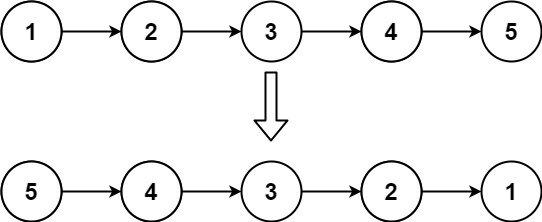

输入：head = [1,2,3,4,5]

输出：[5,4,3,2,1]

示例 2：

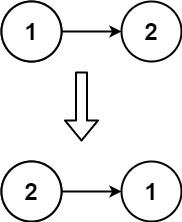

输入：head = [1,2]

输出：[2,1]

示例 3：

输入：head = []

输出：[]
 

进阶：链表可以选用迭代或递归方式完成反转。你能否用两种方法解决这道题？

In [ ]:
# Definition for singly-linked list.
# class ListNode:
#     def __init__(self, val=0, next=None):
#         self.val = val
#         self.next = next
class Solution:
    def reverseList_double_pointers(self, head: Optional[ListNode]) -> Optional[ListNode]:
        if head == []:
            return []

    # 双指针法，一个在后一个在前
        prev = None
        current = head
        
        while current:
            next_node = current.next  # 保存下一个节点
            current.next = prev  # 反转当前节点的指针
            prev = current  # 更新前一个节点
            current = next_node  # 移动到下一个节点
        
        return prev
    
    # 递归法
    # 定义一个辅助函数，然后迭代

    def reverseList_recursion(self, head: Optional[ListNode]) -> Optional[ListNode]:

        # recursive function
        def reverse(cur: ListNode, pre: ListNode) -> ListNode:
            if cur == None:
                return pre
            temp = cur.next
            cur.next = pre
            return reverse(temp, cur)

        return reverse(head, None)


### **复杂度分析**

#### **时间复杂度**
- 每个节点仅被访问一次，共 $n$ 个节点。
- 时间复杂度为 $O(n)$。

#### **空间复杂度**
- 由于递归调用栈的深度为链表的长度 $n$，空间复杂度为 $O(n)$。

与迭代法相比，递归法在空间使用上较高。


#### 复杂度对比：
| 方法        | 时间复杂度 | 空间复杂度 |
|-------------|------------|------------|
| 递归法      | $O(n)$   | $O(n)$   |
| 迭代法      | $O(n)$   | $O(1)$   |

递归法的逻辑较直观，但在链表很长时可能导致栈溢出问题，因此推荐在需要优化空间使用时采用迭代法。

### **24. 两两交换链表中的节点**

用虚拟头结点，这样会方便很多。

本题链表操作就比较复杂了，建议大家先看视频，视频里我讲解了注意事项，为什么需要temp保存临时节点。

题目链接/文章讲解/视频讲解： https://programmercarl.com/0024.%E4%B8%A4%E4%B8%A4%E4%BA%A4%E6%8D%A2%E9%93%BE%E8%A1%A8%E4%B8%AD%E7%9A%84%E8%8A%82%E7%82%B9.html



给你一个链表，两两交换其中相邻的节点，并返回交换后链表的头节点。你必须在不修改节点内部的值的情况下完成本题（即，只能进行节点交换）。

**示例 1：**

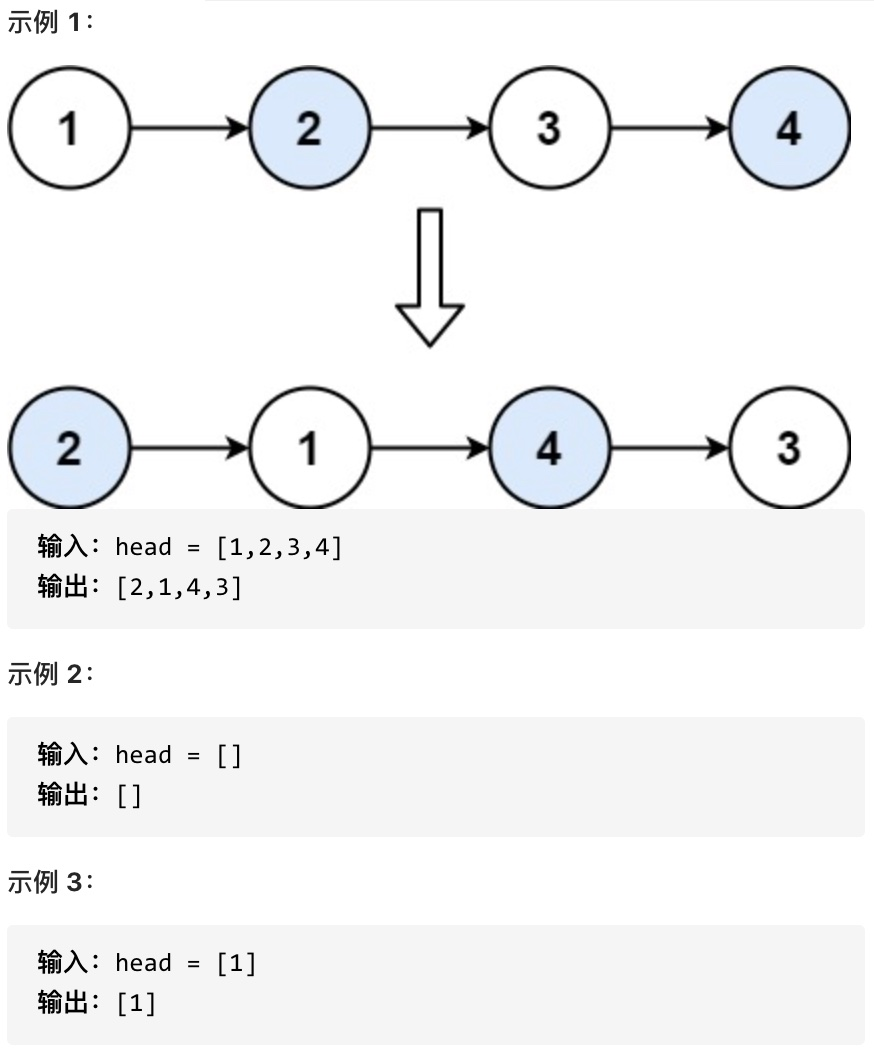
```
输入：head = [1,2,3,4]
输出：[2,1,4,3]
```

**示例 2：**

```
输入：head = []
输出：[]
```

**示例 3：**

```
输入：head = [1]
输出：[1]
```

**提示：**

- 链表中节点的数目在范围 `[0, 100]` 内
- `0 <= Node.val <= 100`

In [50]:
# 结束条件
# 如果链表长度为奇数，则current.next.next为空
# 如果链表长度为偶数, 则current.next为空
# 如果长度为0，也满足偶数条件，current.next为空

# 一起判断就行，不需要分类讨论

# 交换逻辑
# temp_1 = current.next
# temp_3 = current.next.next.next

# while current.next and current.next.next:
        
    # current.next = current.next.next
    # current.next.next = temp_1
    # temp_1.next = temp_3

    # 最后移动current指针
    # current = current.next.next

# return dummy_head.next

# Definition for singly-linked list.
from typing import Optional
class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next

class Solution:
    def swapPairs_dummy_head(self, head: Optional[ListNode]) -> Optional[ListNode]:

        dummy_head = ListNode(next=head)
        current = dummy_head

        while current.next and current.next.next:
            temp_1 = current.next
            temp_3 = current.next.next.next
            current.next = current.next.next
            current.next.next = temp_1
            temp_1.next = temp_3

            # 最后移动current指针
            current = current.next.next

        return dummy_head.next

    def swapPairs_recursion(self, head: Optional[ListNode]) -> Optional[ListNode]:

        # 定义递归函数
        def swap(cur: Optional[ListNode]) -> Optional[ListNode]:
            # 递归终止条件 如果链表为空或者只有一个节点（head 或 head.next 为 None），直接返回当前节点。
            if not cur or not cur.next:
                return cur

            # 交换当前两个节点
            new_head = cur.next  # 第二个节点作为新头
            cur.next = swap(new_head.next)  # 递归处理后续节点并连接
            new_head.next = cur  # 完成当前两个节点的交换

            return new_head  # 返回新头节点

        return swap(head)



In [51]:
# 定义链表节点类
class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next

# 辅助函数：从列表创建链表
def create_linked_list(values):
    if not values:
        return None
    head = ListNode(values[0])
    current = head
    for value in values[1:]:
        current.next = ListNode(value)
        current = current.next
    return head

# 辅助函数：从链表生成列表
def linked_list_to_list(head):
    result = []
    while head:
        result.append(head.val)
        head = head.next
    return result

# 测试代码
def test_swap_pairs():
    solution = Solution()
    test_cases = [
        {"input": [1, 2, 3, 4], "expected": [2, 1, 4, 3]},
        {"input": [], "expected": []},
        {"input": [1], "expected": [1]},
        {"input": [1, 2, 3], "expected": [2, 1, 3]},
    ]
    
    for i, case in enumerate(test_cases):
        head = create_linked_list(case["input"])
        expected = case["expected"]

        # 测试虚拟头结点方法
        swapped_head_dummy = solution.swapPairs_dummy_head(head)
        result_dummy = linked_list_to_list(swapped_head_dummy)
        assert result_dummy == expected, f"Test case {i + 1} failed for dummy head: Expected {expected}, Got {result_dummy}"
        print(f"Test case {i + 1} passed for dummy head: Output {result_dummy}")

        # 重新创建链表，因为 dummy head 方法会修改原链表
        head = create_linked_list(case["input"])

        # 测试递归方法
        swapped_head_recursion = solution.swapPairs_recursion(head)
        result_recursion = linked_list_to_list(swapped_head_recursion)
        assert result_recursion == expected, f"Test case {i + 1} failed for recursion: Expected {expected}, Got {result_recursion}"
        print(f"Test case {i + 1} passed for recursion: Output {result_recursion}")

# 运行测试
test_swap_pairs()

Test case 1 passed for dummy head: Output [2, 1, 4, 3]
Test case 1 passed for recursion: Output [2, 1, 4, 3]
Test case 2 passed for dummy head: Output []
Test case 2 passed for recursion: Output []
Test case 3 passed for dummy head: Output [1]
Test case 3 passed for recursion: Output [1]
Test case 4 passed for dummy head: Output [2, 1, 3]
Test case 4 passed for recursion: Output [2, 1, 3]


In [ ]:
# 19. 删除链表的倒数第 N 个结点

给你一个链表，删除链表的倒数第 n 个结点，并且返回链表的头结点。

示例 1：

输入：head = [1,2,3,4,5], n = 2

输出：[1,2,3,5]

示例 2：
输入：head = [1], n = 1

输出：[]

示例 3：

输入：head = [1,2], n = 1

输出：[1]
 

提示：

链表中结点的数目为 sz

1 <= sz <= 30

0 <= Node.val <= 100

1 <= n <= sz

## 在链表操作中，当我们输出头节点时，通常是指从实际的头节点开始遍历整个链表，而不是只输出头节点本身的值

In [52]:
# 双指针的经典应用，如果要删除倒数第n个节点，让fast移动n步，然后让fast和slow同时移动，直到fast指向链表末尾。删掉slow所指向的节点就可以了。

# Definition for singly-linked list.
# class ListNode:
#     def __init__(self, val=0, next=None):
#         self.val = val
#         self.next = next

class Solution:
    def removeNthFromEnd(self, head: Optional[ListNode], n: int) -> Optional[ListNode]:
        dummy_head = ListNode(0, head)

        slow = dummy_head
        
        fast = dummy_head
        for _ in range(n+1):
            fast = fast.next
            
        while fast:
            slow = slow.next
            fast = fast.next

        slow.next = slow.next.next

        return dummy_head.next
    


In [ ]:
# 递归嵌套子函数写法，但好像不是特别简洁
# 

class Solution:
    def removeNthFromEnd(self, head: Optional[ListNode], n: int) -> Optional[ListNode]:
        # 定义递归函数
        def remove(node: Optional[ListNode], n: int) -> int:
            if not node:  # 递归终止条件：到达链表末尾
                return 0

            # 递归返回当前节点的序号（从链表末尾计数）
            index_from_end = remove(node.next, n) + 1

            # 如果当前节点是倒数第 n 个节点的前一个节点，删除它
            if index_from_end == n + 1:
                node.next = node.next.next

            return index_from_end

        # 创建虚拟头节点，以统一删除逻辑
        dummy = ListNode(0, head)

        # 从虚拟头节点开始递归
        remove(dummy, n)

        # 返回新链表的头节点
        return dummy.next
    



### 复杂度分析

#### 双指针法：

- **快指针的移动**：
  - 快指针移动 $n + 1$ 步，时间复杂度为 $O(n)$。

- **快慢指针的同步移动**：
  - 快指针从第 $n + 1$ 个节点移动到链表末尾，同时慢指针移动到倒数第 $n + 1$ 个节点，总步数为 $O(n)$。

- **删除节点的操作**：
  - 修改指针 `slow.next`，时间复杂度为 $O(1)$。

**总时间复杂度**：$O(n)$。

- **指针存储**：
  - 使用两个指针 `fast` 和 `slow`，额外的空间复杂度为 $O(1)$。

**总空间复杂度**：$O(1)$。



#### 递归：

1. **时间复杂度**：$O(n)$
   - 递归方法需要遍历整个链表一次，每个节点被访问一次。

2. **空间复杂度**：$O(n)$
   - 由于递归调用栈的深度等于链表的长度，空间复杂度为线性。


| 方法               | 时间复杂度 | 空间复杂度 | 备注                       |
|--------------------|------------|------------|----------------------------|
| **双指针法**       | $O(n)$   | $O(1)$   | 高效，无递归，无额外空间。 |
| **递归方法**       | $O(n)$   | $O(n)$   | 递归栈的空间消耗较大。     |

双指针法适用于链表长度较长的场景，因为其空间复杂度为 $O(1)$，没有递归栈溢出的风险，因此是更推荐的实现方式。

# 链表相交

给你两个单链表的头节点 `headA` 和 `headB`，请你找出并返回两个单链表相交的起始节点。如果两个链表没有交点，返回 `null`。

题目数据 **保证** 整个链式结构中不存在环。

**注意**：函数返回结果后，链表必须 **保持其原始结构**。

---

## **图示：链表相交**

两个链表在节点 `c1` 开始相交：

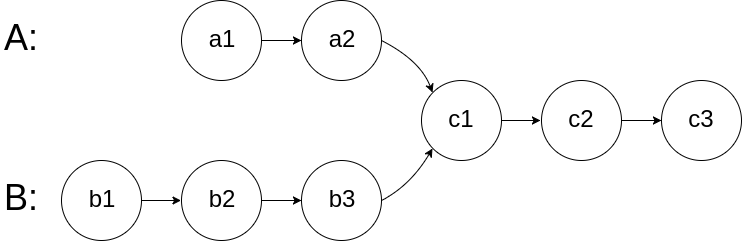

---

## **示例**

### **示例 1**

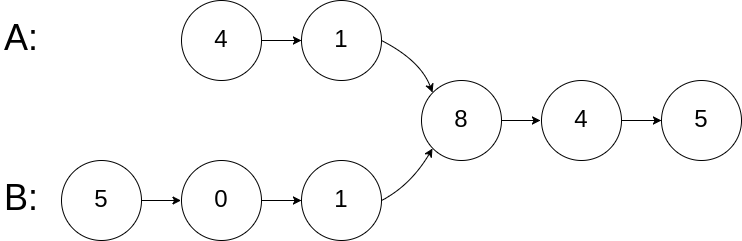

**输入**：
- `intersectVal = 8`
- `listA = [4,1,8,4,5]`
- `listB = [5,0,1,8,4,5]`
- `skipA = 2`
- `skipB = 3`

**输出**：
```
Intersected at '8'
```

**解释**：
- 相交节点的值为 `8`（注意，如果两个链表相交则不能为 0）。
- 从各自的表头开始算起：
  - 链表 A 为 `[4,1,8,4,5]`
  - 链表 B 为 `[5,0,1,8,4,5]`
- 在 A 中，相交节点前有 2 个节点；在 B 中，相交节点前有 3 个节点。

---

### **示例 2**

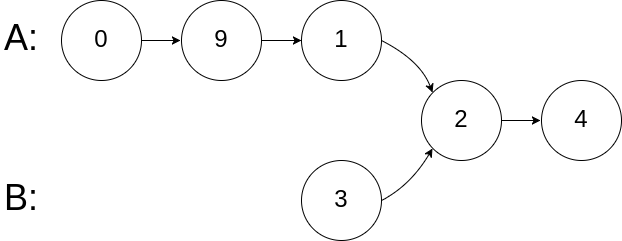

**输入**：
- `intersectVal = 2`
- `listA = [0,9,1,2,4]`
- `listB = [3,2,4]`
- `skipA = 3`
- `skipB = 1`

**输出**：
```
Intersected at '2'
```

**解释**：
- 相交节点的值为 `2`（注意，如果两个链表相交则不能为 0）。
- 从各自的表头开始算起：
  - 链表 A 为 `[0,9,1,2,4]`
  - 链表 B 为 `[3,2,4]`
- 在 A 中，相交节点前有 3 个节点；在 B 中，相交节点前有 1 个节点。

---

### **示例 3**

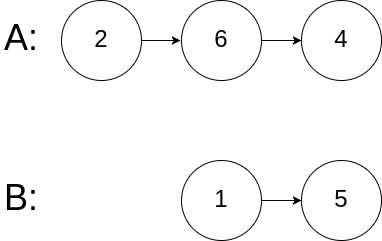

**输入**：
- `intersectVal = 0`
- `listA = [2,6,4]`
- `listB = [1,5]`
- `skipA = 3`
- `skipB = 2`

**输出**：
```
null
```

**解释**：
- 从各自的表头开始算起：
  - 链表 A 为 `[2,6,4]`
  - 链表 B 为 `[1,5]`
- 由于这两个链表不相交，因此 `intersectVal` 必须为 0，而 `skipA` 和 `skipB` 可以是任意值。
- 返回 `null`，因为链表不相交。

---

## **提示**

- `listA` 中节点数目为 `m`。
- `listB` 中节点数目为 `n`。
- $0 \leq m, n \leq 3 \times 10^4$。
- $1 \leq \text{Node.val} \leq 10^5$。
- $0 \leq \text{skipA} \leq m$。
- $0 \leq \text{skipB} \leq n$。
- 如果 `listA` 和 `listB` 没有交点，则 `intersectVal = 0`。
- 如果 `listA` 和 `listB` 有交点，则 $ \text{intersectVal} = \text{listA[skipA + 1]} = \text{listB[skipB + 1]} $。

---

## **进阶**

**你能否设计一个时间复杂度为 $O(n)$ 且仅用 $O(1)$ 内存的解决方案？**

---

简单来说，就是求两个链表交点节点的指针

注意： 交点不是数值相等，而是指针相等。

In [ ]:
class Solution:
    def getIntersectionNode(self, headA: ListNode, headB: ListNode) -> ListNode:
        lenA, lenB = 0, 0
        cur = headA
        while cur:         # 求链表A的长度
            cur = cur.next 
            lenA += 1
        cur = headB 
        while cur:         # 求链表B的长度
            cur = cur.next 
            lenB += 1
        curA, curB = headA, headB
        if lenA > lenB:     # 让curB为最长链表的头，lenB为其长度
            curA, curB = curB, curA
            lenA, lenB = lenB, lenA 
        for _ in range(lenB - lenA):  # 让curA和curB在同一起点上（末尾位置对齐）
            curB = curB.next 
        while curA:         #  遍历curA 和 curB，遇到相同则直接返回
            if curA == curB: # 注意比较的是node对象
                return curA
            else:
                curA = curA.next 
                curB = curB.next
        return None  

# 环形链表 II

## 问题说明
给定一个链表的头节点 `head`，要求返回链表中开始入环的第一个节点。如果链表无环，则返回 `null`。

- **链表存在环的条件**：如果某个节点可以通过连续跟踪 `next` 指针再次到达，则链表存在环。
- **输入的特殊说明**：评测系统通过整数 `pos` 标识链表中环的情况：
  - `pos >= 0`：表示链表尾部连接到索引为 `pos` 的节点。
  - `pos == -1`：表示链表中没有环。
- **限制条件**：链表不能被修改。

## 示例

### 示例 1
链表：`[3, 2, 0, -4]`  
`pos = 1`  
**输出**：返回索引为 1 的链表节点  
**解释**：链表中有一个环，尾部连接到第二个节点。

---

### 示例 2
链表：`[1, 2]`  
`pos = 0`  
**输出**：返回索引为 0 的链表节点  
**解释**：链表中有一个环，尾部连接到第一个节点。

---

### 示例 3
链表：`[1]`  
`pos = -1`  
**输出**：`null`  
**解释**：链表中没有环。


In [55]:
# 快慢指针，如果相遇就说明有环

# 自己写的1，无限循环了

class Solution:
    def detectCycle(self, head: Optional[ListNode]) -> Optional[ListNode]:

        slow = ListNode(0, head)
        fast = slow.next
        pos = -1
        # fast开始遍历
        while fast.next != slow.next and fast.next is not None:
            fast = fast.next
            slow = slow.next
            pos += 1

        return pos


In [ ]:
class Solution:
    def detectCycle(self, head: Optional[ListNode]) -> Optional[ListNode]:

        slow = head
        fast = head
        pos = -1
        # fast开始遍历
        while fast.next != slow.next and fast.next is not None:
            fast = fast.next.next
            slow = slow.next

            # If there is a cycle, the slow and fast pointers will eventually meet
            if slow == fast:
                # Move one of the pointers back to the start of the list
                slow = head
                while slow != fast:
                    slow = slow.next
                    fast = fast.next
                return slow

        return None


当 $ n > 1 $ 时，即快指针在环内多绕了 $ n-1 $ 圈之后才和慢指针相遇，其实仍然可以通过相同的方法找到环的入口节点。这是因为链表的环是一个循环结构，快慢指针在环内的移动和绕行不会改变公式的本质关系。以下是详细解释：

---

### 1. **环的循环性质**

环的结构使得从某个起点出发，无论走几圈，最终都可以回到这个起点。因此，无论快指针在环内绕了多少圈，入口节点的位置相对于头节点的距离 $ x $ 和相对于相遇点的距离 $ z $ 是不变的。

---

### 2. **公式的推导**

相遇时的公式：
$$
x + y = n \cdot (y + z)
$$
目标是求 $ x $：
$$
x = n \cdot (y + z) - y
$$
提取环的长度 $ (y + z) $：
$$
x = (n - 1) \cdot (y + z) + z
$$

- $ n \cdot (y + z) $ 表示快指针在环内走了 $ n $ 圈的总步数。
- $ (n - 1) \cdot (y + z) $ 表示多余的 $ n-1 $ 圈。
- 最后剩下的一部分 $ z $ 是从相遇点到环入口的距离。

因此，公式中的 $ x = z $，无论 $ n $ 的值是多少，头指针和相遇点的指针按照每次一步的速度相遇时，总会在环入口相遇。

---

### 3. **为什么 $ n > 1 $ 的情况不需要特殊处理？**

1. **快慢指针的相对关系**：
   快指针多绕 $ n-1 $ 圈，并不会改变公式的数学关系，因为环的长度 $ (y+z) $ 已经固定。每绕一圈，快指针的额外距离正好被 $ y+z $ 抵消。

2. **算法行为不受影响**：
   无论 $ n $ 的值是多少，相遇后重新从头节点和相遇点分别出发，每次移动一步，最终都会在环的入口节点相遇。多余的 $ n-1 $ 圈只是在环内循环，最后的 $ z $ 决定了相遇点。

---

### 4. **动画类比（直线与环）**

- **n=1**：快指针刚好比慢指针多跑了一圈，直接相遇。
- **n=2**：快指针多跑了一圈再相遇，但入口节点位置未变。头指针和相遇点的指针仍然会在入口相遇。
- **n=3 或更多**：快指针在环内绕更多圈才相遇，结果同理。

---

### 5. **总结**

无论 $ n $ 的值是 1 还是大于 1，公式 $ x = z $ 始终成立。这是因为环的循环性质将多余的 $ n-1 $ 圈折叠成了等效的一圈。因此，通过两个指针从头节点和相遇点同时出发，最终会在环的入口节点相遇。